In [47]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob
import pandas as pd
import seaborn as sns
import tqdm

In [48]:
lambd = 1e-6
# Er = getEr(lambd)
omega0 = 2 * np.pi * 299792458 / 1e-6
tau = 2*pi/omega0
nc = omega0*omega0/(4*pi*pi*81)
# dt = (20*tau/31570)
omega0, nc

(1883651567308853.2, 1.109574294736812e+27)

In [63]:
DIR = "D_0.1_A_0.1"
NX = 1000
NODE1 = 300
NODE2 = 600
ALL_FILES = glob.glob(os.path.join(DIR, "*.sdf"))
ALL_FILES.sort()

X = np.linspace(-5, 5, NX)
T = np.linspace(0, 20*tau, len(ALL_FILES))*1e15

In [6]:
all_dirs = glob.glob("D_*")
# all_dirs
len(all_dirs)

150

In [ ]:
def save_density(directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    
    plt.imshow(np.array(D)/nc, aspect="auto", cmap="gray")
    cmap = colors.ListedColormap("gray")
    plt.colorbar(cmap=cmap)
    file_name=f"{directory}.jpg"
    file_dir = os.path.join("Images", file_name)
    # print(file_dir)
    plt.title(file_name.replace(".jpg", ""))
    plt.savefig(file_dir)
    plt.close()

In [125]:
for d in tqdm.tqdm(all_dirs, desc="Saving images"):
    save_density(d)

Saving images: 100%|██████████| 150/150 [01:18<00:00,  1.92it/s]


In [82]:
data = sdf.read(ALL_FILES[10])

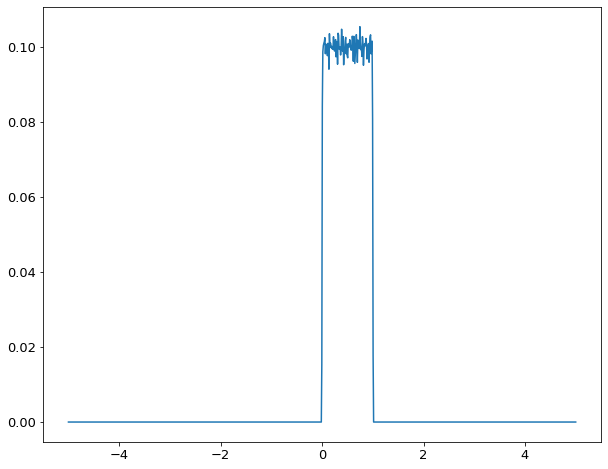

In [83]:
plt.plot(X, data.Derived_Number_Density_Electron.data/nc)

In [59]:
def get_field(id, component="y"):
    raw_data = sdf.read(ALL_FILES[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

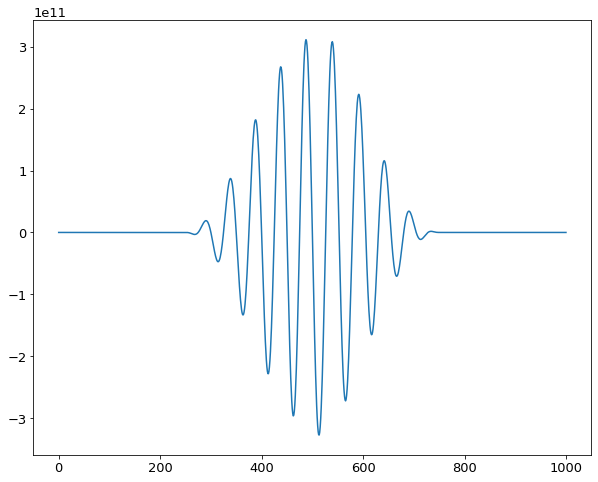

In [64]:
plt.plot(get_field(100, "y"))

In [54]:
def find_reflectance(directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    Ey1 = []
    Ey2 = []
    
    for file in all_files:
        data = sdf.read(file)
        Ey1.append(data.Electric_Field_Ey.data[NODE1])
        Ey2.append(data.Electric_Field_Ey.data[NODE2])
    
    R = (np.sum(np.array(Ey1)**2)-np.sum(np.array(Ey2)**2))/np.sum(np.array(Ey1)**2)
    D = directory.split("_")[1]
    A = directory.split("_")[-1]
    return R, float(D), float(A)

In [38]:
Rs = []
Ds = []
As = []
for d in tqdm.tqdm(all_dirs, desc="Finding reflectance"):
    R, D, A = find_reflectance(d)
    Rs.append(R)
    Ds.append(D)
    As.append(A)

Finding reflectance: 100%|██████████| 150/150 [00:34<00:00,  4.41it/s]


In [39]:
result = pd.DataFrame({"D": Ds, "A": As, "R": Rs})

In [40]:
result.sort_values(by=["D", "A"], inplace=True)
result

,D,A,R
114,0.1,0.1,0.016247
115,0.1,0.5,0.014190
116,0.1,1.0,0.018076
118,0.1,2.0,0.015606
119,0.1,5.0,0.015462
...,...,...,...
34,10.0,0.5,0.999992
35,10.0,1.0,0.999765
37,10.0,2.0,0.998842
38,10.0,5.0,0.992664


In [41]:
result["A"].value_counts()

0.1     25
0.5     25
1.0     25
2.0     25
5.0     25
10.0    25
Name: A, dtype: int64

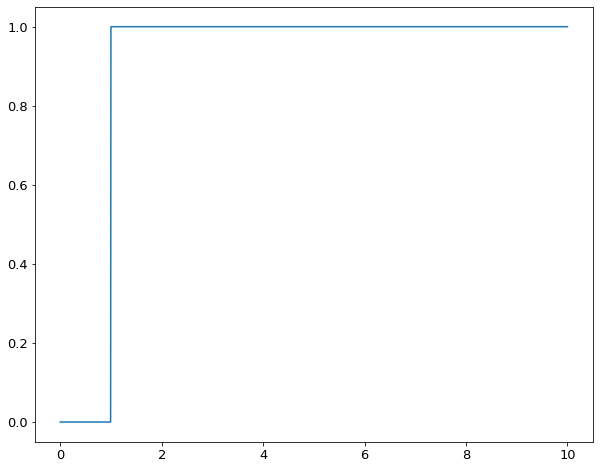

In [42]:
X = np.linspace(0,10, 1500)
def step(x):
    return 1*(x>1)
Y = step(X)
plt.plot(X, Y)

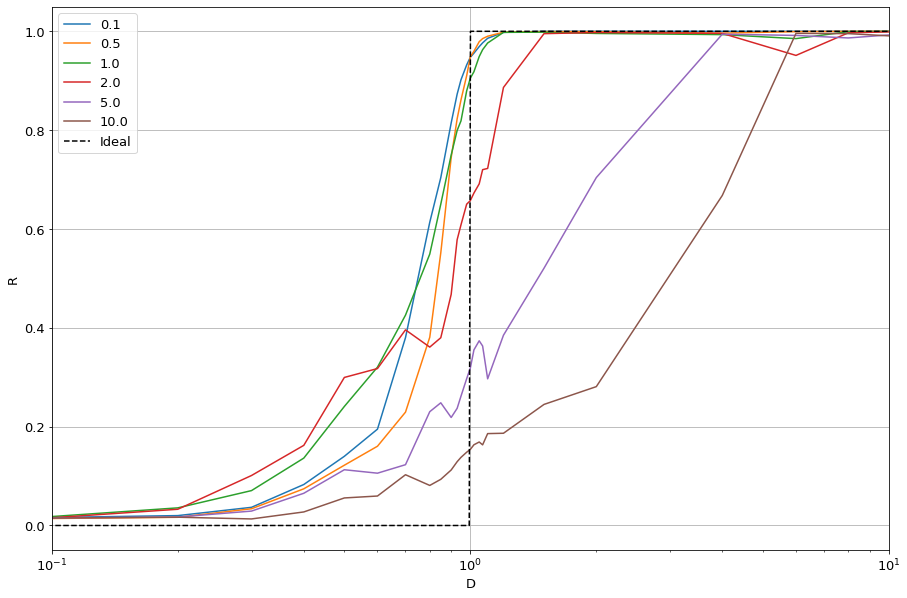

In [43]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=result, x="D", y="R", hue="A", palette="tab10")
plt.plot(X, Y, color="black", linestyle="--", label="Ideal")
plt.xscale("log")
# plt.yscale("log")
plt.xlim(0.1, 10)
plt.grid()
plt.legend();

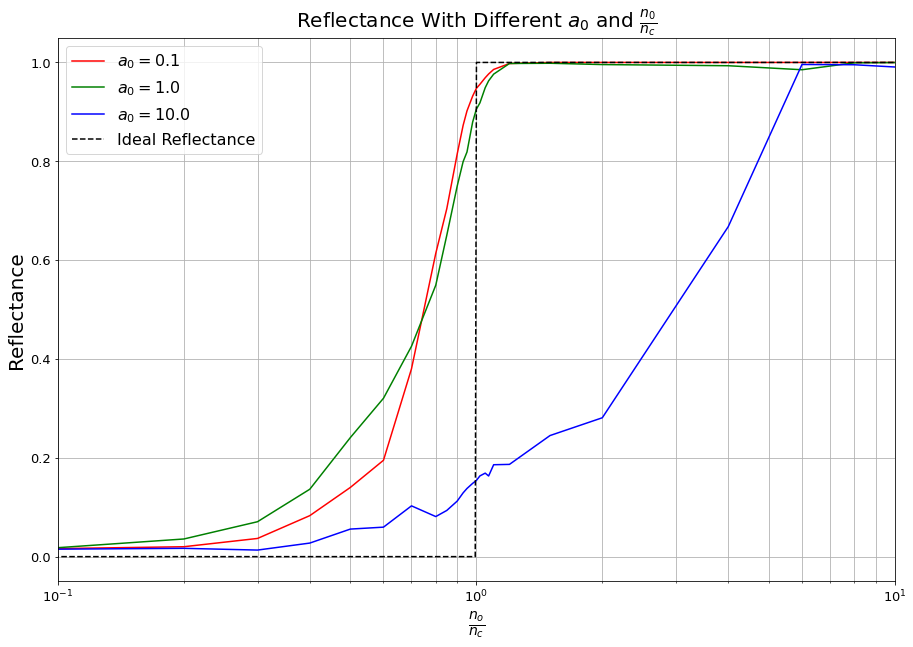

In [45]:
colors_ = ["r", "g", "b", "y", "c", "m", "k", "w"]
plt.figure(figsize=(15, 10))
for i, A in enumerate([0.1, 1.0, 10.0]):
    plt.plot(result[result["A"]==A]["D"], result[result["A"]==A]["R"], label=f"$a_0={A}$", color=colors_[i])
plt.plot(X, Y, color="black", linestyle="--", label="Ideal Reflectance")
plt.xscale("log")
plt.xlim(0.1, 10)
plt.grid(which='both')
plt.legend(fontsize=16);
plt.title(r"Reflectance With Different $a_0$ and $\frac{n_0}{n_c}$", fontsize=20)
plt.xlabel(r"$\frac{n_o}{n_c}$", fontsize=20)
plt.ylabel("Reflectance", fontsize=20)
plt.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/Project_Sem_3/Presentations/Reports/Sem_3_Minor/reflection.png", dpi=300)

In [180]:
def plot_density(ax, directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    
    ax.imshow(np.array(D)[:, :]/nc, aspect="auto", cmap="gray")
    print(np.array(D).shape)
    # ax.set_xticks([])

(135, 1000)


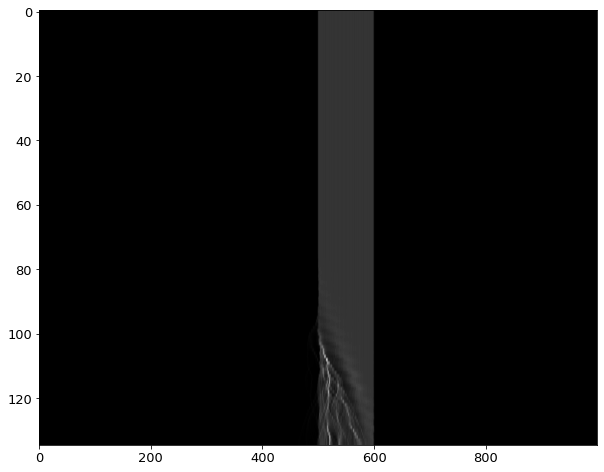

In [181]:
plot_density(plt.gca(), "D_1.0_A_1")

In [189]:
80*20/135

11.851851851851851

In [8]:
def plot_density(ax, directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    den = directory.split("_")[1]
    a0 = directory.split("_")[-1]
    ax.imshow(np.array(D)[80:135, 450:620]/nc, aspect="auto", cmap="gray", extent=[-0.5, 1.2, 20, 11.85])
    ax.set_xlabel(r"$x$ in $\lambda_l$", fontsize=16)
    ax.set_ylabel(r"$t$ in $\tau$", fontsize=16)
    ax.set_title(f"$a_0 = {a0}$", fontsize=16)
    # ax.set_xticks(list(np.arange(0, 1.70, 0.01)))
    # cmap = colors.ListedColormap("gray")
    # ax.colorbar(cmap=cmap)
    # file_name=f"{directory}.jpg"
    # file_dir = os.path.join("Images", file_name)
    # print(file_dir)
    # ax.title(file_name.replace(".jpg", ""))
    # ax.savefig(file_dir)
    # ax.close()

In [32]:
def plot_density(ax, directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    den = directory.split("_")[1]
    a0 = directory.split("_")[-1]
    ax.imshow(np.array(D)[10*80:10*135, 450:620]/nc, aspect="auto", cmap="plasma", extent=[-0.5, 1.2, 20, 11.85])
    ax.set_xlabel(r"$x$ in $\lambda_l$", fontsize=16)
    ax.set_ylabel(r"$t$ in $\tau$", fontsize=16)
    ax.set_title(f"$a_0 = {a0}$", fontsize=16)

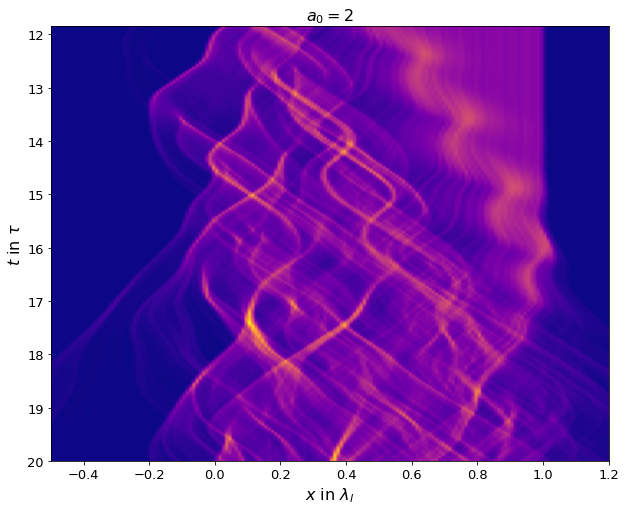

In [66]:
plot_density(plt.gca(), "D_1.0_A_2")

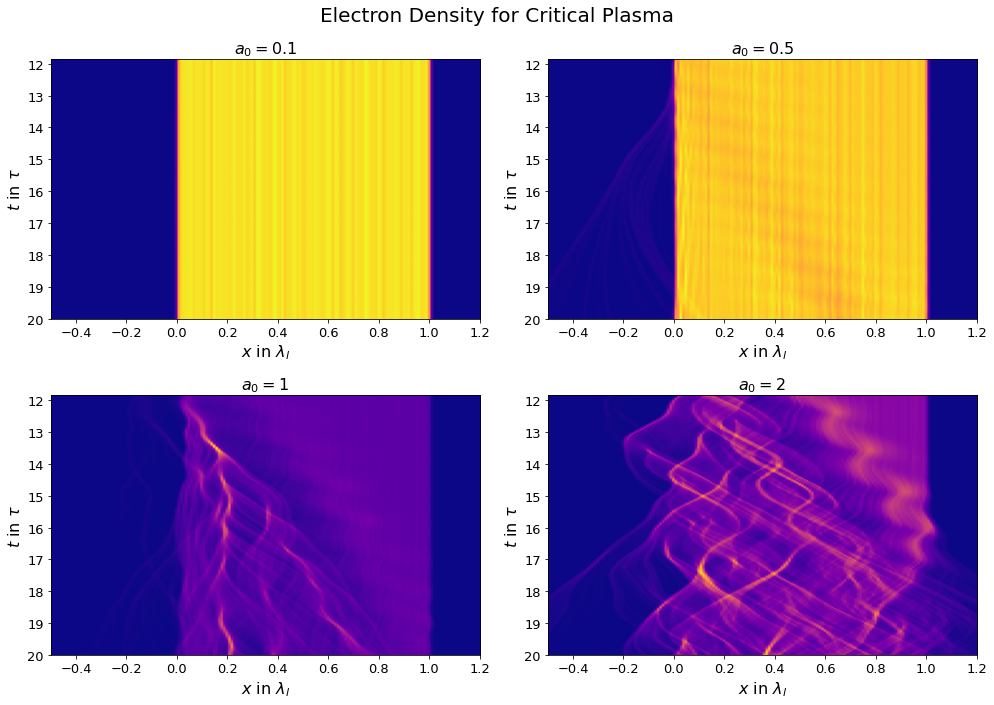

In [35]:
dirs = ['D_1.0_A_0.1', 'D_1.0_A_0.5','D_1.0_A_1', 'D_1.0_A_2',]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Electron Density for Critical Plasma", fontsize=20)
for i, d in enumerate(dirs):
    plot_density(axes[i//2, i%2], d)
plt.tight_layout()
plt.savefig("/media/hari31416/Hari_SSD/Users/harik/Desktop/Project_Sem_3/Presentations/Reports/Sem_3_Minor/density.png", dpi=300)